<a href="https://colab.research.google.com/github/Finardiprof/Python/blob/main/portafoglio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import yfinance as yf
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

portfolio = ["NVDA", "GOOGL", "TSLA", "MSFT", "AMZN"]
data_inizio = "2023-01-01"
data_fine = "2023-12-31"
portfolio_data = yf.download(portfolio, start= data_inizio, end=data_fine)

#imposta il budget (esempio 1000 eur)
budget = float(input("Inserisci il budget: "))

# Calcola la quantità di azioni da acquistare
allocazione = [0.3, 0.40, 0.1, 0.1, 0.1] # La somma deve essere 1 (100%)
quantity = []
for i in range(len(portfolio)):
  quantity.append(budget * allocazione[i] / portfolio_data.Close.iloc[0,i])

# Calculate daily returns for each stock
daily_returns = portfolio_data.Close.pct_change()

# Calcolo il valore delle azioni in base alle quantità presenti
stock_value = (portfolio_data.Close * quantity)

# Calcolo il valore del portafoglio
portfolio_value = (portfolio_data.Close * quantity).sum(axis=1)

[*********************100%%**********************]  5 of 5 completed
Inserisci il budget: 1000


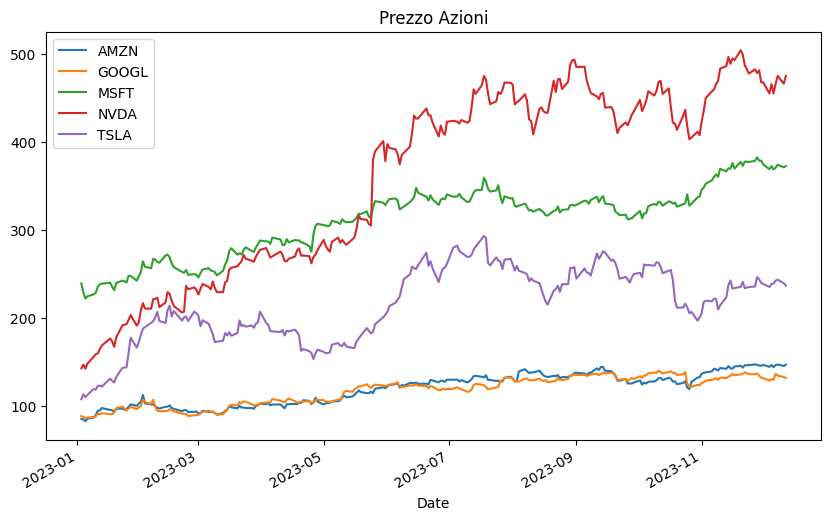

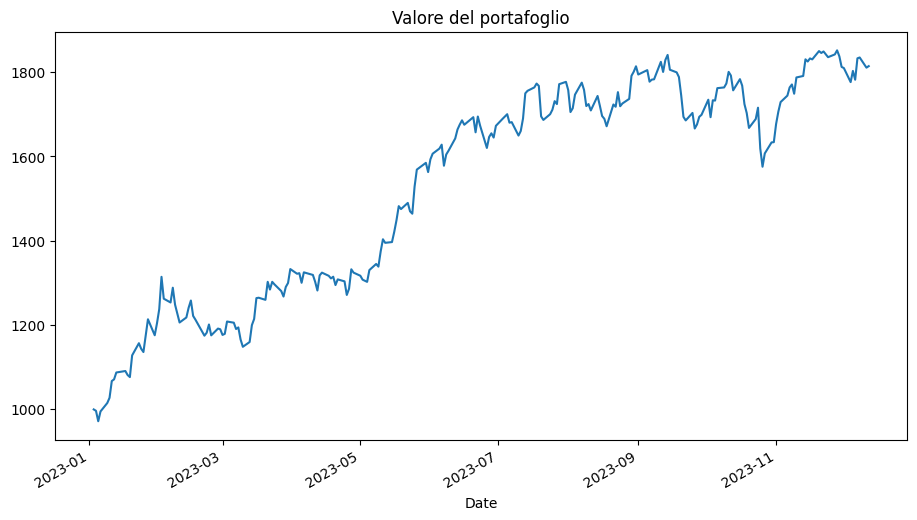

In [ ]:
# Visualize the portfolio value
portfolio_data.Close.plot(figsize=(10, 6), title="Prezzo Azioni")
plt.show()
portfolio_value.plot(figsize=(11, 6),title="Valore del portafoglio")
plt.show()
#plt.show()
#plt.hist(daily_returns)

In [ ]:
# Per salvare in un file Excel:
# portfolio_data.to_excel('dataframe.xlsx', index=False)
#print(portfolio_data.head())

# Define the file path for the Excel file
file_path = 'Monitor Portafoglio.xlsx'

# Export the DataFrame to an Excel file
portfolio_value.to_excel(file_path, index=True)

# Download the Excel file to your local machine
from google.colab import files
files.download(file_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Statistica di base
import statistics

moda = statistics.mode(portfolio_value)
print("Moda: ",moda)
media = statistics.mean(portfolio_value)
print("Media: ",media)
devstd = statistics.stdev(portfolio_value)
print("Deviazione Standard: ",devstd)

Moda:  1000.0
Media:  1522.0096639626208
Deviazione Standard:  252.89318776549592
